In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from nets import *
from cfgs import *
from data import *
from trainer import *
from payment_utils import get_payment


In [6]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})

# 1x10なので、ランダムサンプルを生成
cfg = additive_1x10_gamma_11_config.cfg
cfg.test.batch_size = 1000
cfg.test.num_batches = 100
cfg.test.save_output = True
cfg.test.data = "fixed"  # save_outputを使うため、fixedに設定

# テストデータを生成（ランダムサンプル）
np.random.seed(cfg.test.seed)
num_samples = cfg.test.batch_size * cfg.test.num_batches
X_tst = np.random.gamma(1, 1, size=(num_samples, cfg.num_items))

print(f"Test configuration: {cfg.test.batch_size} samples per batch, {cfg.test.num_batches} batches")
print(f"Total test samples: {num_samples}")


Test configuration: 1000 samples per batch, 100 batches
Total test samples: 100000


In [7]:
Net = additive_net.Net
Generator = gamma_11_generator.Generator
Trainer = trainer.Trainer


In [8]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)  # X_tstを渡す
m = Trainer(cfg, "test", net)
m.test(generator)


2025-11-14 12:18:18,578:INFO:TEST ALL-400000: t = 0.7642, Net_Loss: -5.822447, Revenue: 5.822447
2025-11-14 12:18:18,578:INFO:TEST ALL-400000: t = 0.7642, Net_Loss: -5.822447, Revenue: 5.822447


In [9]:
# テスト結果をロード
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy"))
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy"))

print(f"Allocation shape: {alloc.shape}")
print(f"Payment shape: {pay.shape}")
print(f"Number of items: {cfg.num_items}")


Allocation shape: (100000, 10)
Payment shape: (100000,)
Number of items: 10


In [10]:
# 各アイテムの割り当て確率の統計を表示
print("Allocation Statistics:")
for i in range(cfg.num_items):
    alloc_i = alloc[:, i]
    print(f"Item {i+1}: mean={alloc_i.mean():.4f}, std={alloc_i.std():.4f}, min={alloc_i.min():.4f}, max={alloc_i.max():.4f}")

print(f"\nPayment Statistics:")
print(f"Mean: {pay.mean():.4f}, Std: {pay.std():.4f}, Min: {pay.min():.4f}, Max: {pay.max():.4f}")


Allocation Statistics:
Item 1: mean=0.7900, std=0.4056, min=0.0000, max=1.0000
Item 2: mean=0.7904, std=0.4053, min=0.0000, max=1.0000
Item 3: mean=0.7892, std=0.4067, min=0.0000, max=1.0000
Item 4: mean=0.7909, std=0.4048, min=0.0000, max=1.0000
Item 5: mean=0.7907, std=0.4050, min=0.0000, max=1.0000
Item 6: mean=0.7901, std=0.4055, min=0.0000, max=1.0000
Item 7: mean=0.7904, std=0.4053, min=0.0000, max=1.0000
Item 8: mean=0.7902, std=0.4053, min=0.0000, max=1.0000
Item 9: mean=0.7906, std=0.4050, min=0.0000, max=1.0000
Item 10: mean=0.7902, std=0.4053, min=0.0000, max=1.0000

Payment Statistics:
Mean: 5.8224, Std: 2.9797, Min: 0.0000, Max: 7.3624


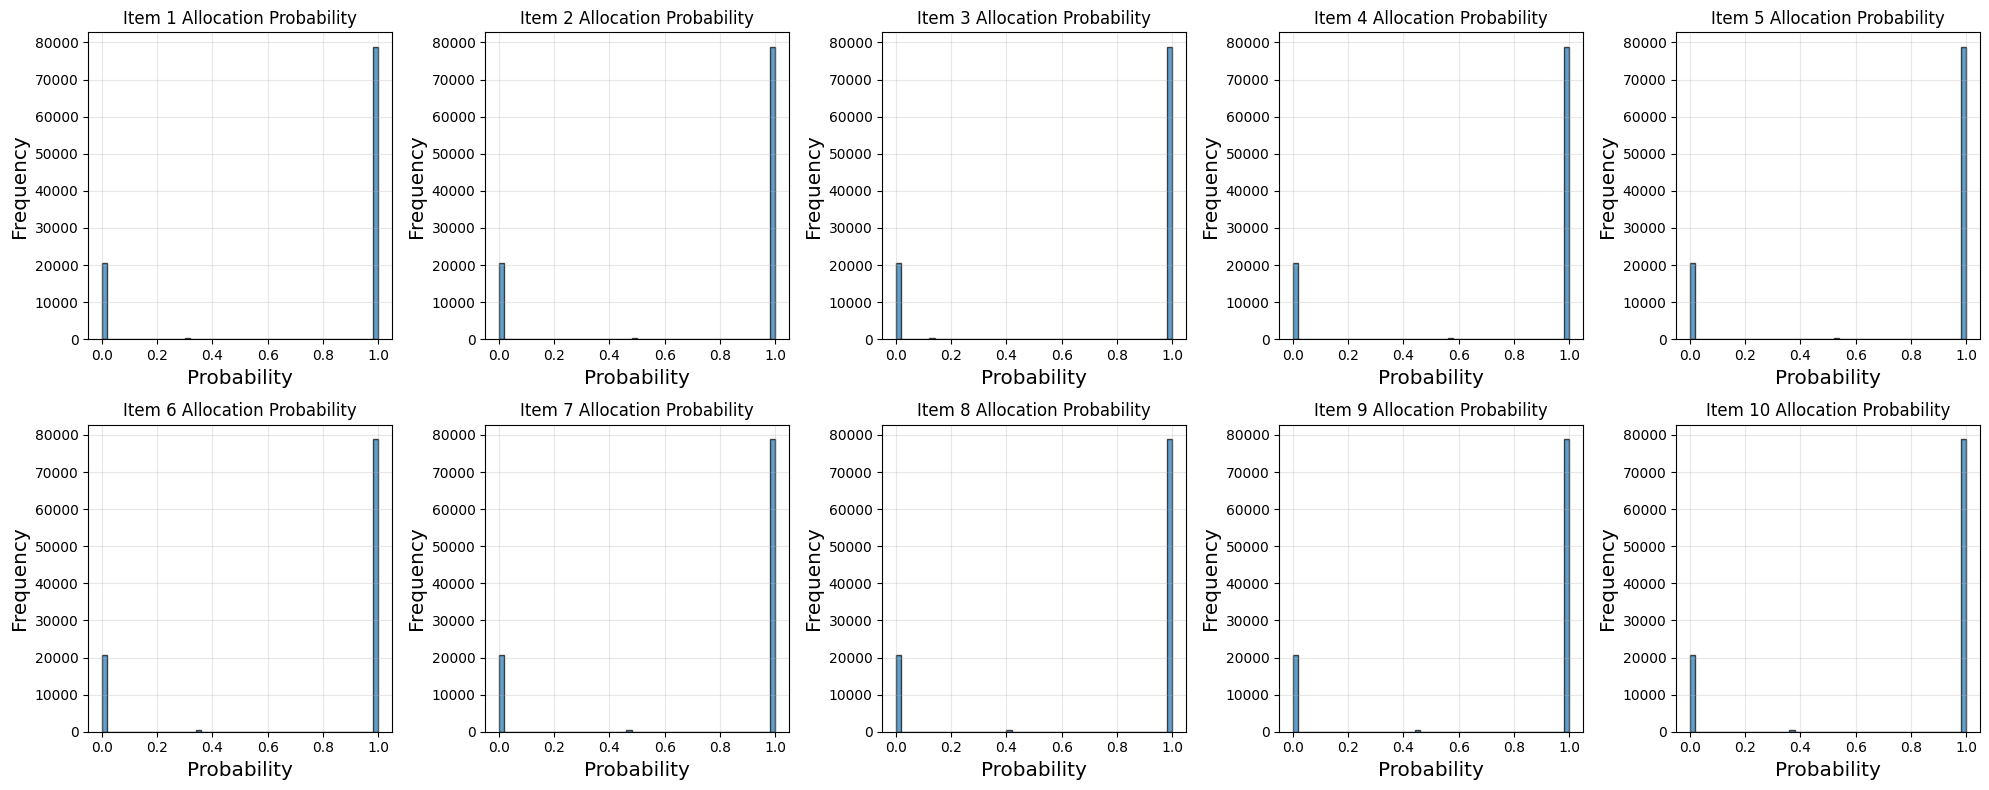

In [11]:
# 各アイテムの割り当て確率のヒストグラム
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(cfg.num_items):
    ax = axes[i]
    alloc_i = alloc[:, i]
    ax.hist(alloc_i, bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'Item {i+1} Allocation Probability')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc_histograms.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()


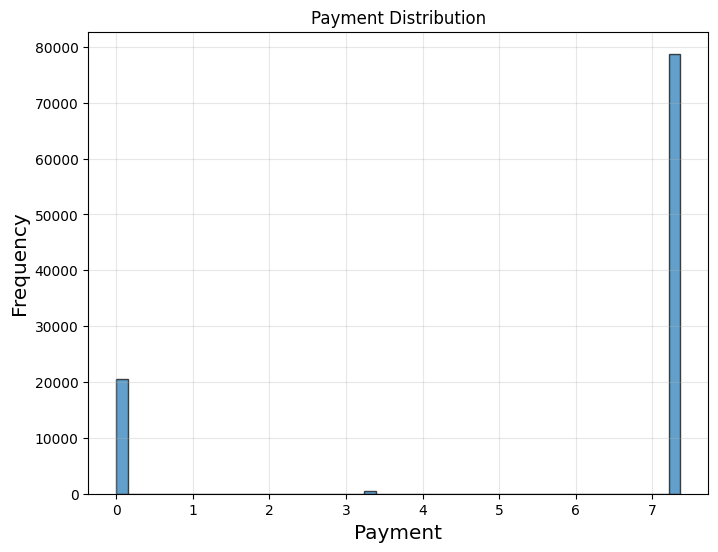

In [12]:
# Paymentのヒストグラム
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

ax.hist(pay, bins=50, alpha=0.7, edgecolor='black')
ax.set_xlabel('Payment')
ax.set_ylabel('Frequency')
ax.set_title('Payment Distribution')
ax.grid(True, alpha=0.3)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'pay_histogram.pdf'), bbox_inches='tight', pad_inches=0.05)
plt.show()
